In [1]:
import os
import sys
sys.path.append('../')

In [2]:
import xgboost as xgb

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from yaml import load as yaml_load
from src.features.build_features import extract_features_regression
from src.data.make_dataset import LoadDataframe
from src.models.train_model import  model_regression
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [7]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [46]:
def _load_config_file(config_file):
    """
    Load configuration file
    :param config_file: is the configuration file
    :return: configuration
    :rtype: dict
    """
    with open(config_file) as yml_config:
        return yaml_load(yml_config)

def _build_configuration(config_file):
    """
    Build the operation configuration dict
    :param config_file: is the path to the yaml config_file
    :type: string
    :return: config: global configuration
    :rtype dict
    """
    # yaml config
    config = _load_config_file(config_file)
    return config

def visualisation_prediction(y_test, y_pred):
    
    matplotlib.rc('xtick', labelsize=30) 
    matplotlib.rc('ytick', labelsize=30) 
    fig, ax = plt.subplots(figsize=(50, 40))
    plt.style.use('ggplot')
    plt.plot(y_pred, y_test, 'ro')
    plt.xlabel('Predicted Crime', fontsize = 30)
    plt.ylabel('Actual Crime', fontsize = 30)
    plt.title('Predicted Y (Crimes) to the Actual Y (Crimes)', fontsize = 30)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

def return_df_concatenate(cl):
    if cl==xgb_regression:
        y_pred_2016_ = cl.predict(xgb.DMatrix(x_test_2016))
    else:
        y_pred_2016_ = cl.predict(x_test_2016)
    df_y_test = pd.DataFrame(y_test_2016.values, columns=['ytest'])
    df_y_pred = pd.DataFrame(y_pred_2016_, columns=['ypred'])
    df_concatenate = pd.concat([x_test_2016, df_y_test, df_y_pred], axis=1)
    return df_concatenate
    
def return_crime_prediction(primary_type, area_name, cl):
    """
    """
    df_concatenate = return_df_concatenate(cl)
    df = df_concatenate[(df_concatenate[primary_type]==1) & (df_concatenate[area_name]==1)]
    df = df[['ypred', 'ytest','month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3',\
                         'month_4', 'month_5','month_6','month_7','month_8','month_9']]
    df['month'] = month
    df.set_index('month', inplace=True)
    df_plot = df[['ypred','ytest']]
    return df_plot

def df_plot_prediction(crime_type, name_area, df_concatenate, cl, title=None):
    """
    """
    
    df = return_crime_prediction(crime_type, name_area, cl)
    ax = df.plot.bar(rot=0, figsize=(15,10), fontsize=10, title= crime_type.replace('primary_type_', "") + " in " + \
                     name_area.replace('community_area_name_', '') + " "  + title)

def return_y_pred(cl, x_test):
    return cl.predict(x_test)



In [9]:
config_file = "/home/ml/Documents/crimes_chigaco/config/config.yml"
config = _build_configuration(config_file)

In [10]:
obj_df_loaded = LoadDataframe(config,'2012', '2016')

In [11]:
%%time
df_nb_crimes = obj_df_loaded.df_nb_crimes()

CPU times: user 13min 6s, sys: 2.02 s, total: 13min 8s
Wall time: 13min 32s


In [12]:
%%time
obj_extract = extract_features_regression(config, df_nb_crimes)
df_ml = obj_extract.extract_feature()
obj_regression = model_regression(config, df_ml) 

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.1 µs


## Implémentation de  régression xgboost

In [13]:
xgb_regression = obj_regression.train_xgboost()
y_pred = xgb_regression.predict(obj_regression.dtest())

[18:08:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1172 extra nodes, 16 pruned nodes, max_depth=20
[18:08:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2596 extra nodes, 84 pruned nodes, max_depth=20
[18:08:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2952 extra nodes, 106 pruned nodes, max_depth=20
[18:08:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2994 extra nodes, 150 pruned nodes, max_depth=20
[18:08:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2932 extra nodes, 156 pruned nodes, max_depth=20
[18:08:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2752 extra nodes, 114 pruned nodes, max_depth=20
[18:08:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2238 extra nodes, 68 pruned nodes, max_depth=20
[18:08:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 3710 extra nodes, 154 pruned

In [14]:
y_test = obj_regression.load_for_ml()[3]

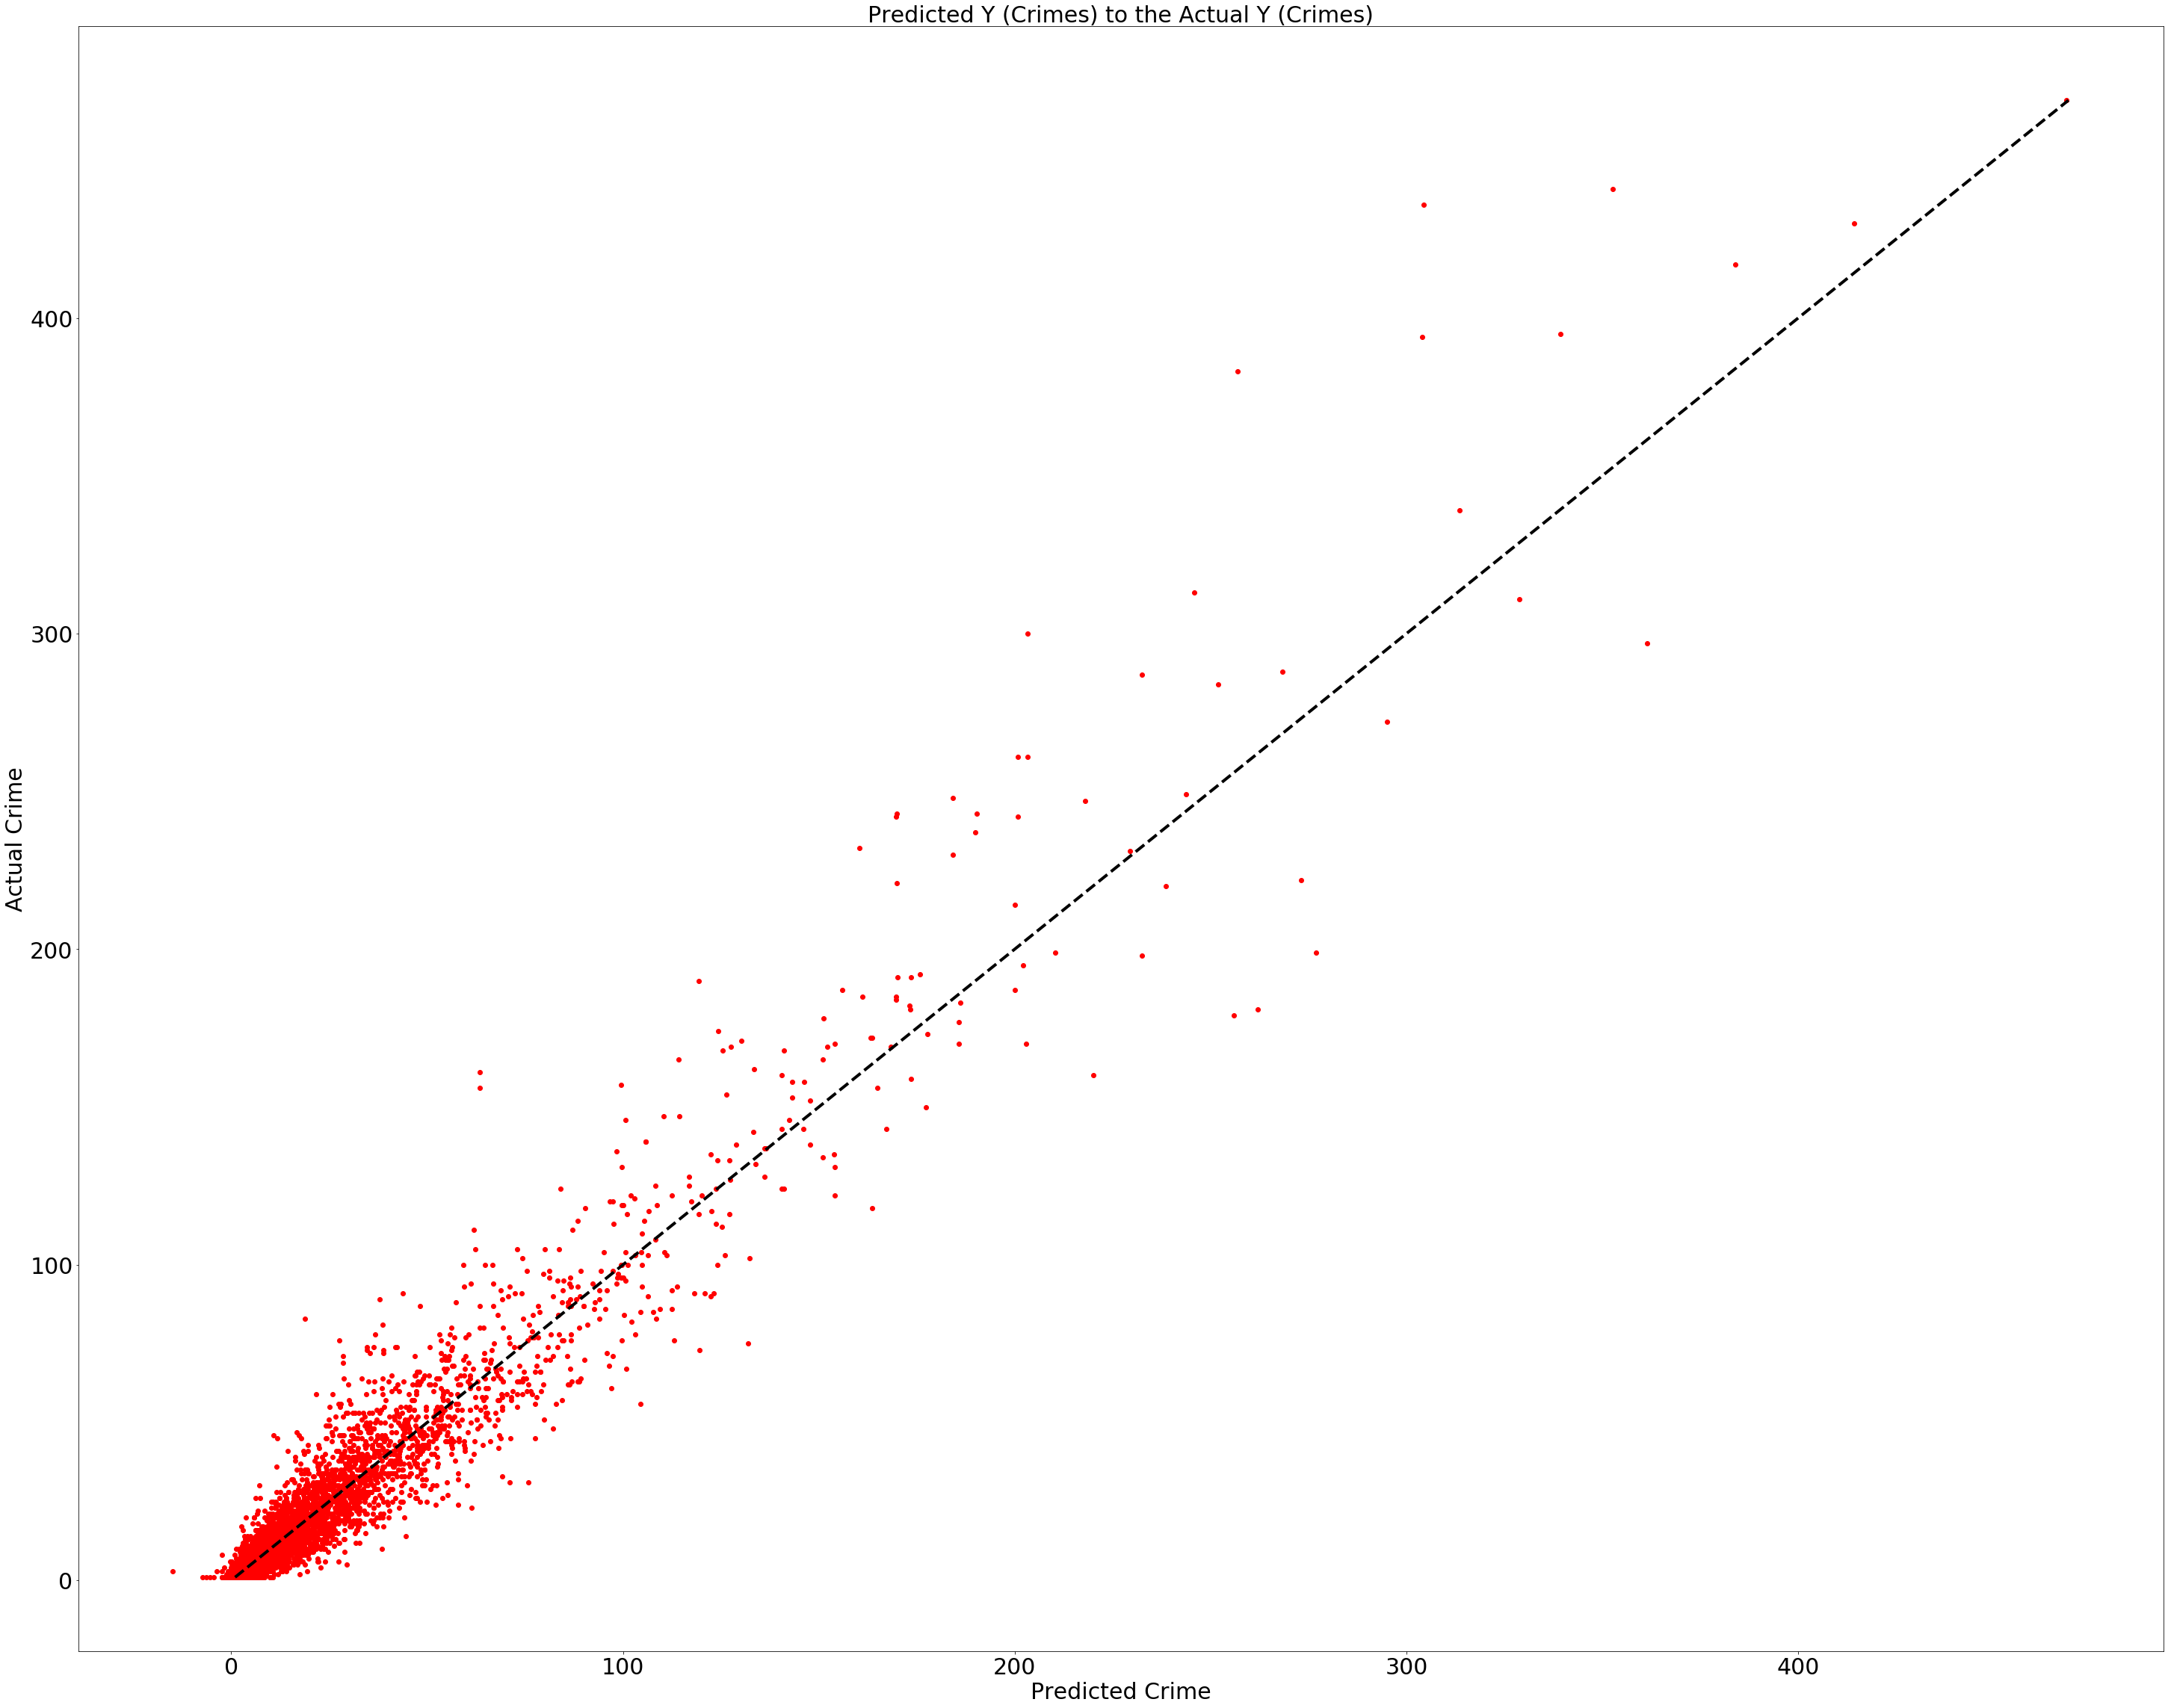

In [15]:
visualisation_prediction(y_test, y_pred)

## Implémentation de régression réseau de neurone via keras

In [16]:
NN_regression = obj_regression.train_NN()

In [17]:
y_test = obj_regression.load_for_ml()[3]

In [18]:
x_test = obj_regression.load_for_ml()[1]

In [19]:
y_pred = NN_regression[0].predict(x_test)

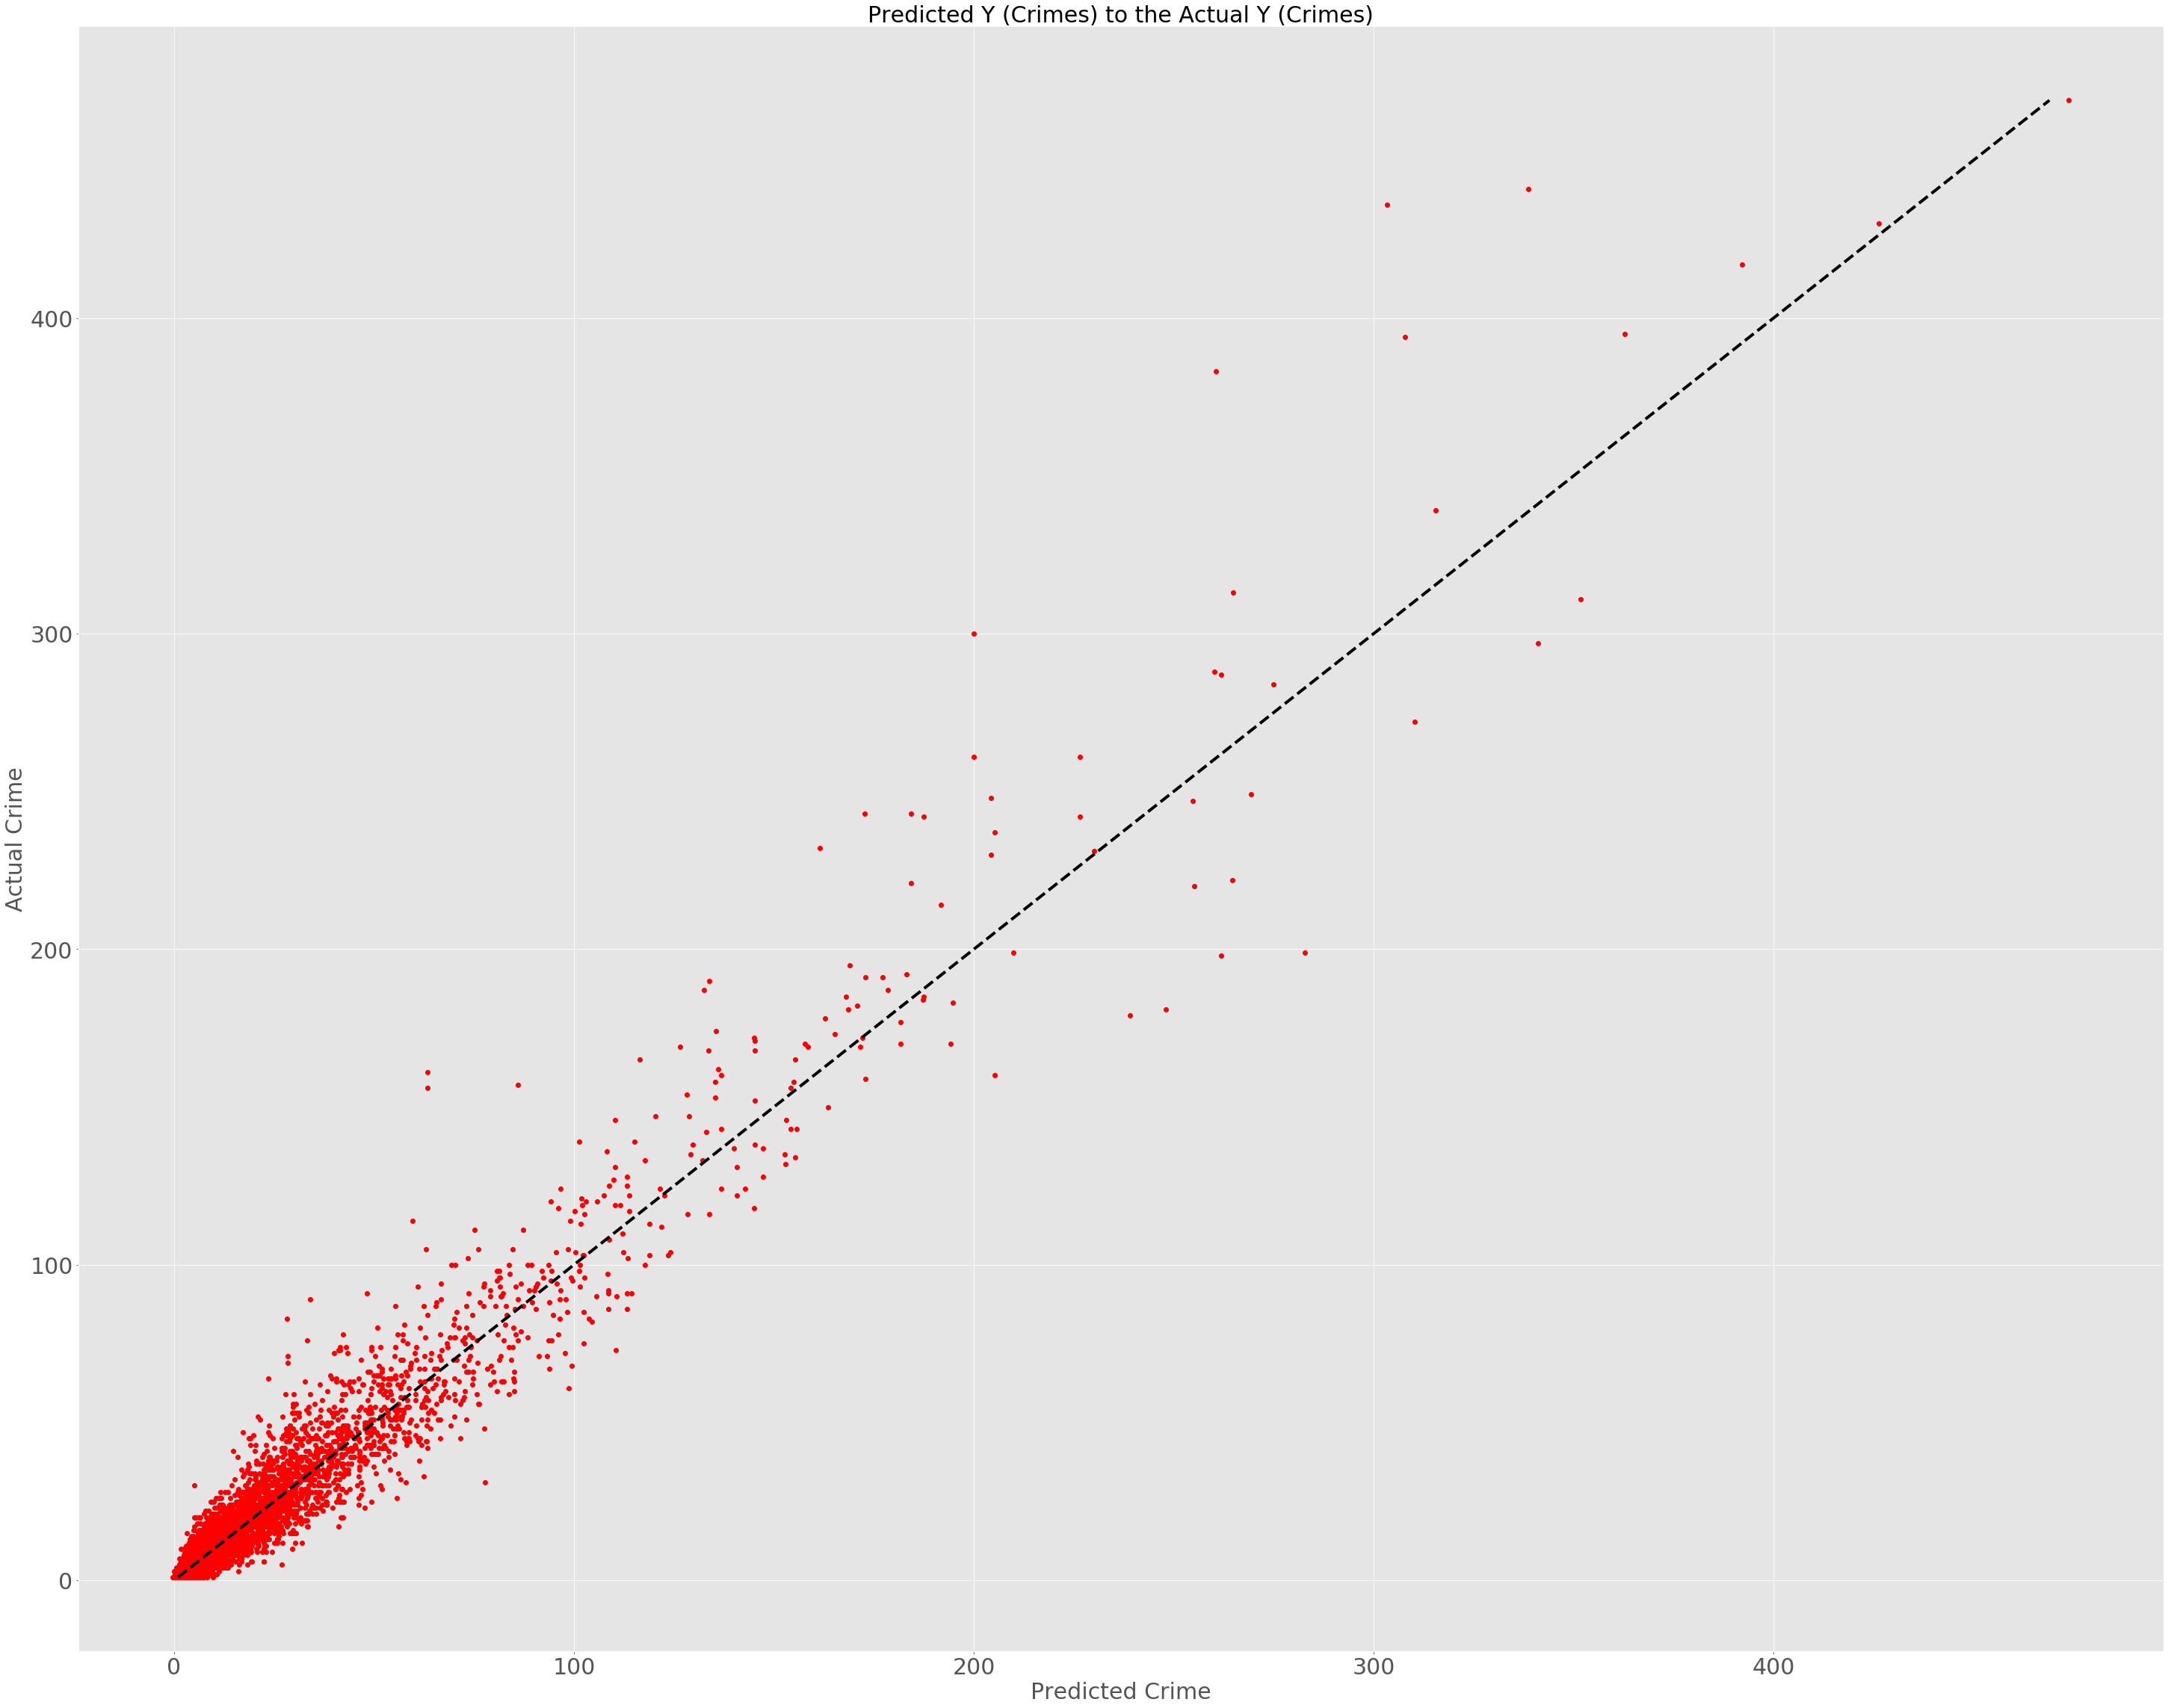

In [20]:
visualisation_prediction(y_test, y_pred)

### Test sur l'année 2016

In [21]:
obj_df_loaded_2016 = LoadDataframe(config,'2016', '2017')

In [22]:
df_test_2016 = obj_df_loaded_2016.df_nb_crimes()

In [23]:
df_test_2016.sample(5)

,nb_crimes,pct_housing_crowded,pct_households_below_poverty,pct_age16_unemployed,pct_age25_no_highschool,pct_not_working_age,per_capita_income,hardship_index,primary_type_ARSON,primary_type_ASSAULT,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6912,5,0.064516,0.684211,0.769231,0.304015,0.707895,0.137334,0.793814,0,1,...,0,1,0,0,0,0,0,0,0,0
11326,2,0.445161,0.289474,0.278846,0.581262,0.581579,0.108776,0.618557,0,0,...,0,0,0,0,0,0,0,0,0,1
7916,2,0.167742,0.515038,0.599359,0.267686,0.594737,0.130126,0.587629,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,1,0.387097,0.184211,0.169872,0.380497,0.476316,0.236715,0.340206,0,0,...,0,1,0,0,0,0,0,0,0,0
8956,13,0.283871,0.498120,0.480769,0.460803,0.726316,0.104116,0.762887,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
y_test_2016 = df_test_2016['nb_crimes']
x_test_2016 = df_test_2016[df_test_2016.columns.difference(['nb_crimes'])]

In [25]:
y_test_2016.shape

(14842,)

In [26]:
x_test_2016.shape

(14842, 126)

In [27]:
y_pred_2016 = NN_regression[0].predict(x_test_2016)

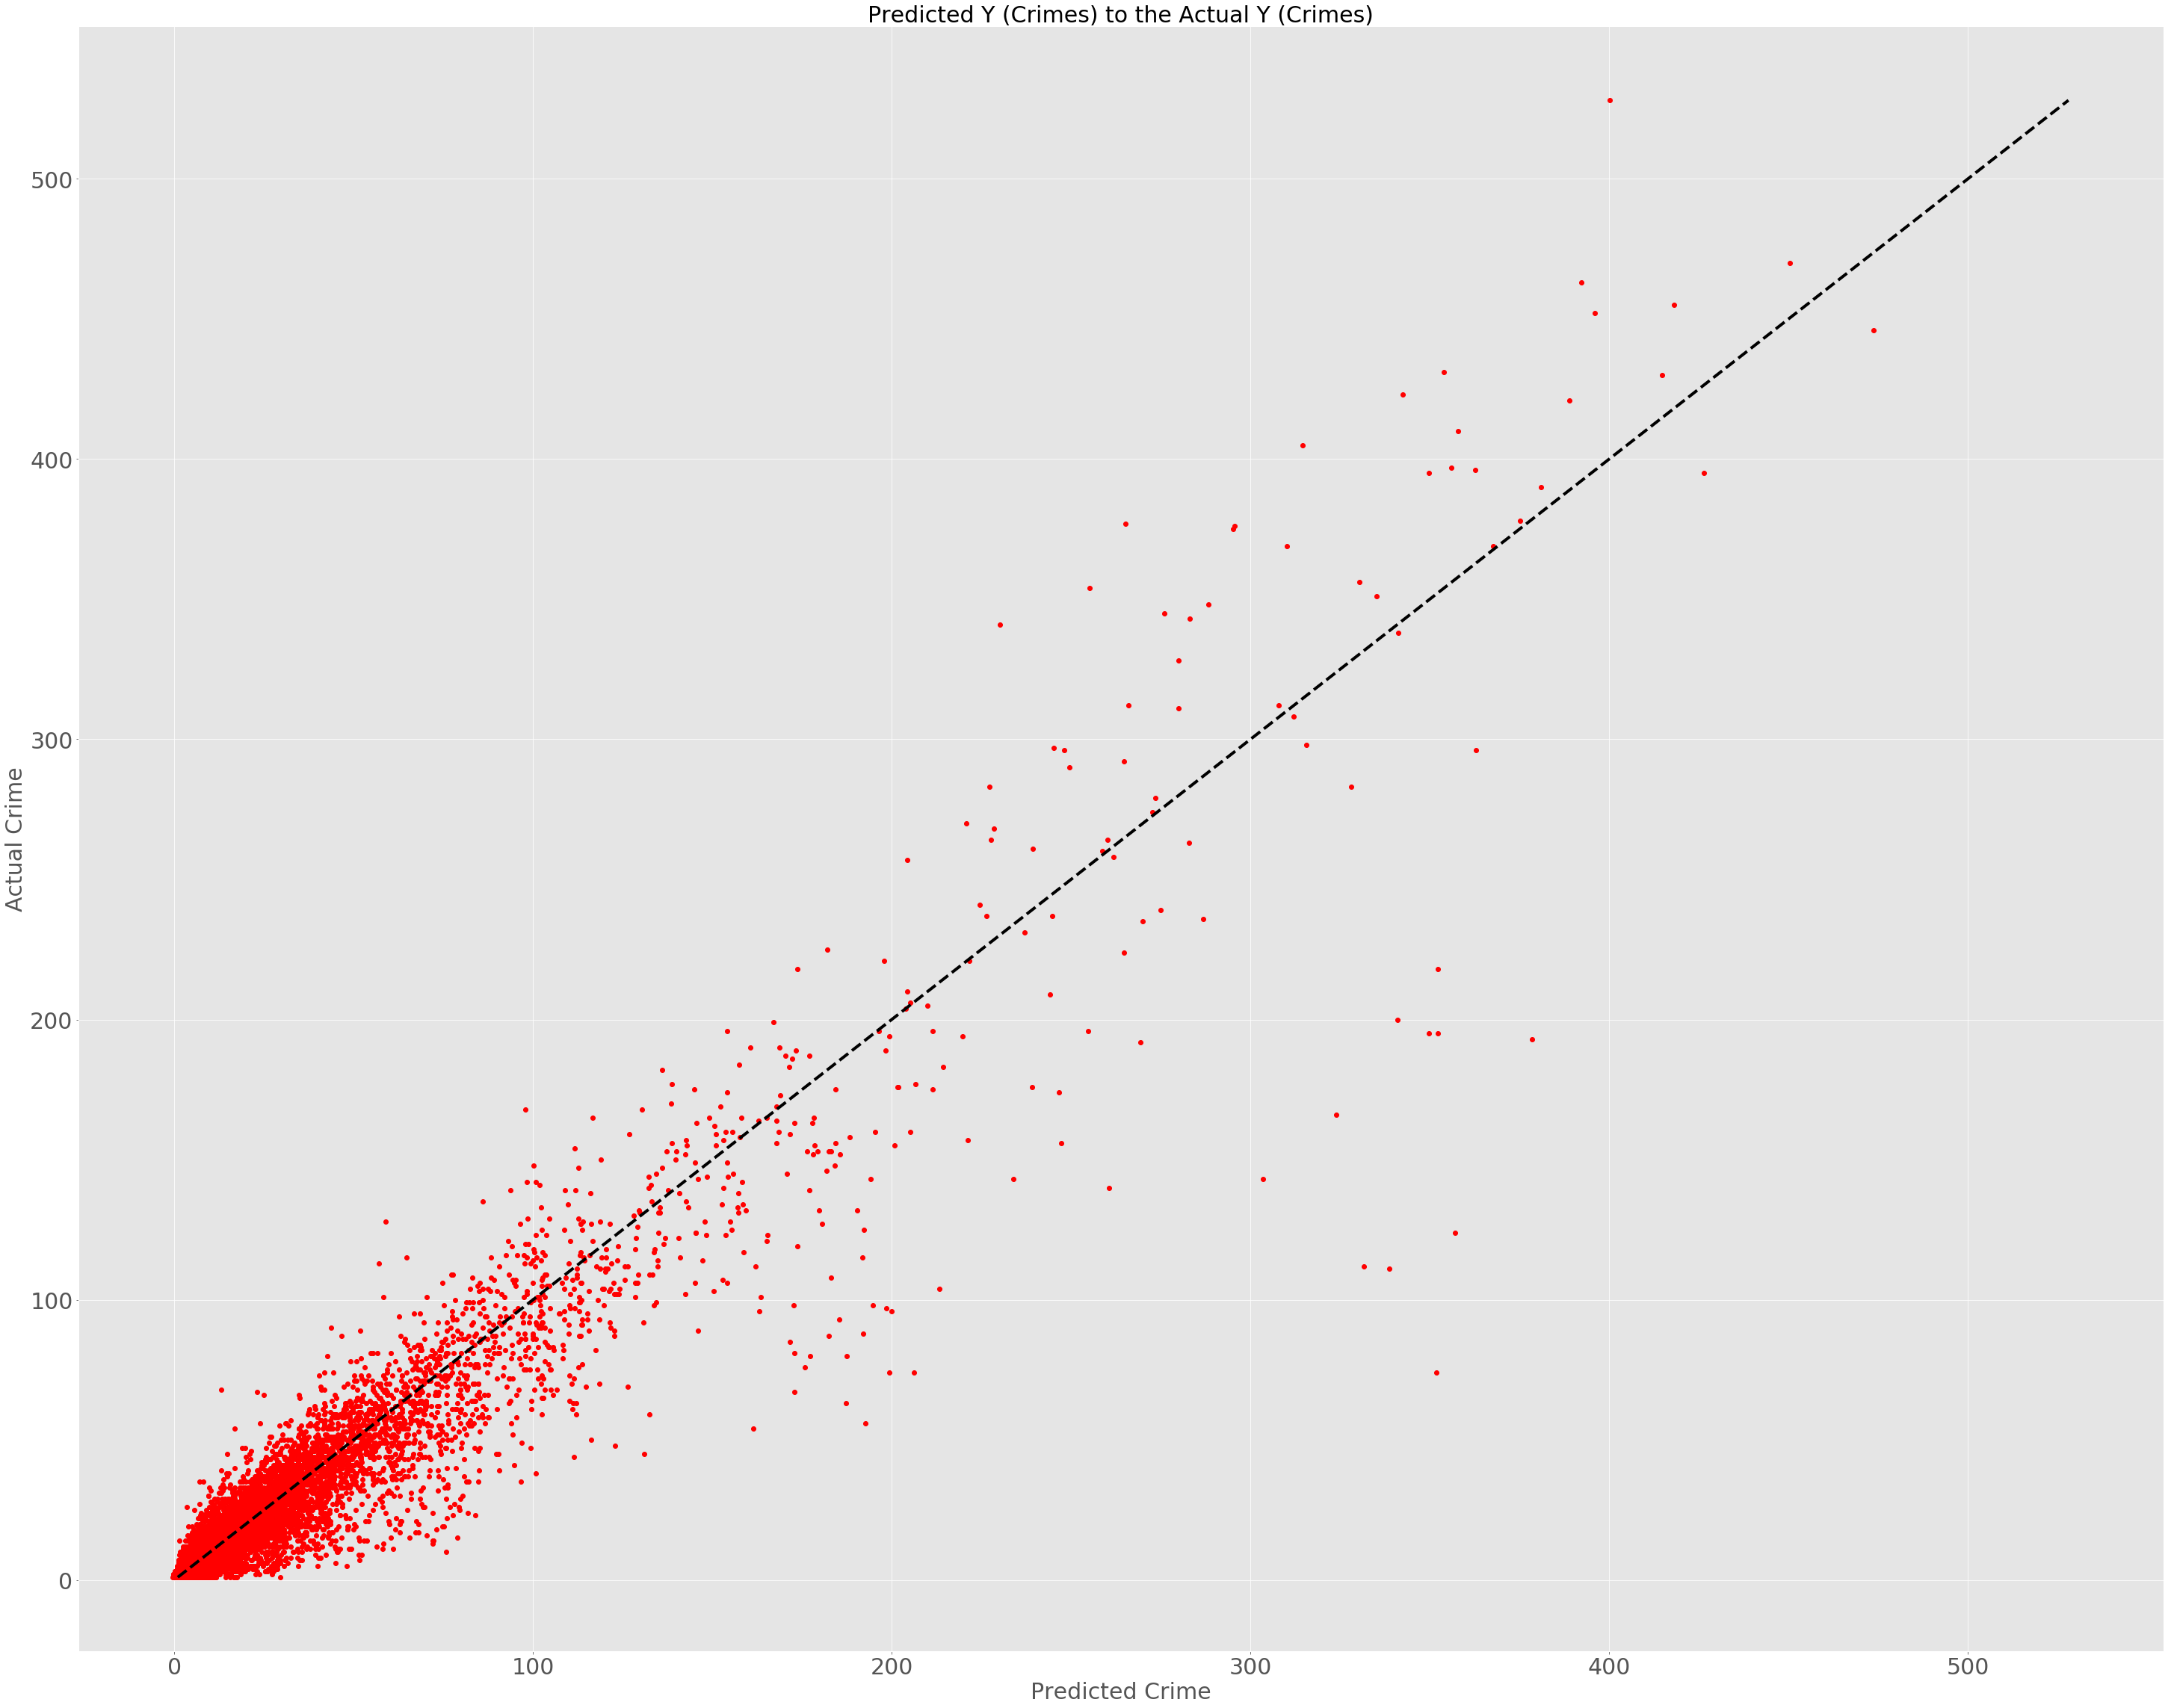

In [28]:
visualisation_prediction(y_test_2016, y_pred_2016)

## Implémentation de régression Random Forest

In [29]:
X_train, x_test, y_train, y_test = obj_regression.load_for_ml()

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 42)

In [32]:
# Train the model on training data
rf.fit(X_train, y_train);

In [33]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)

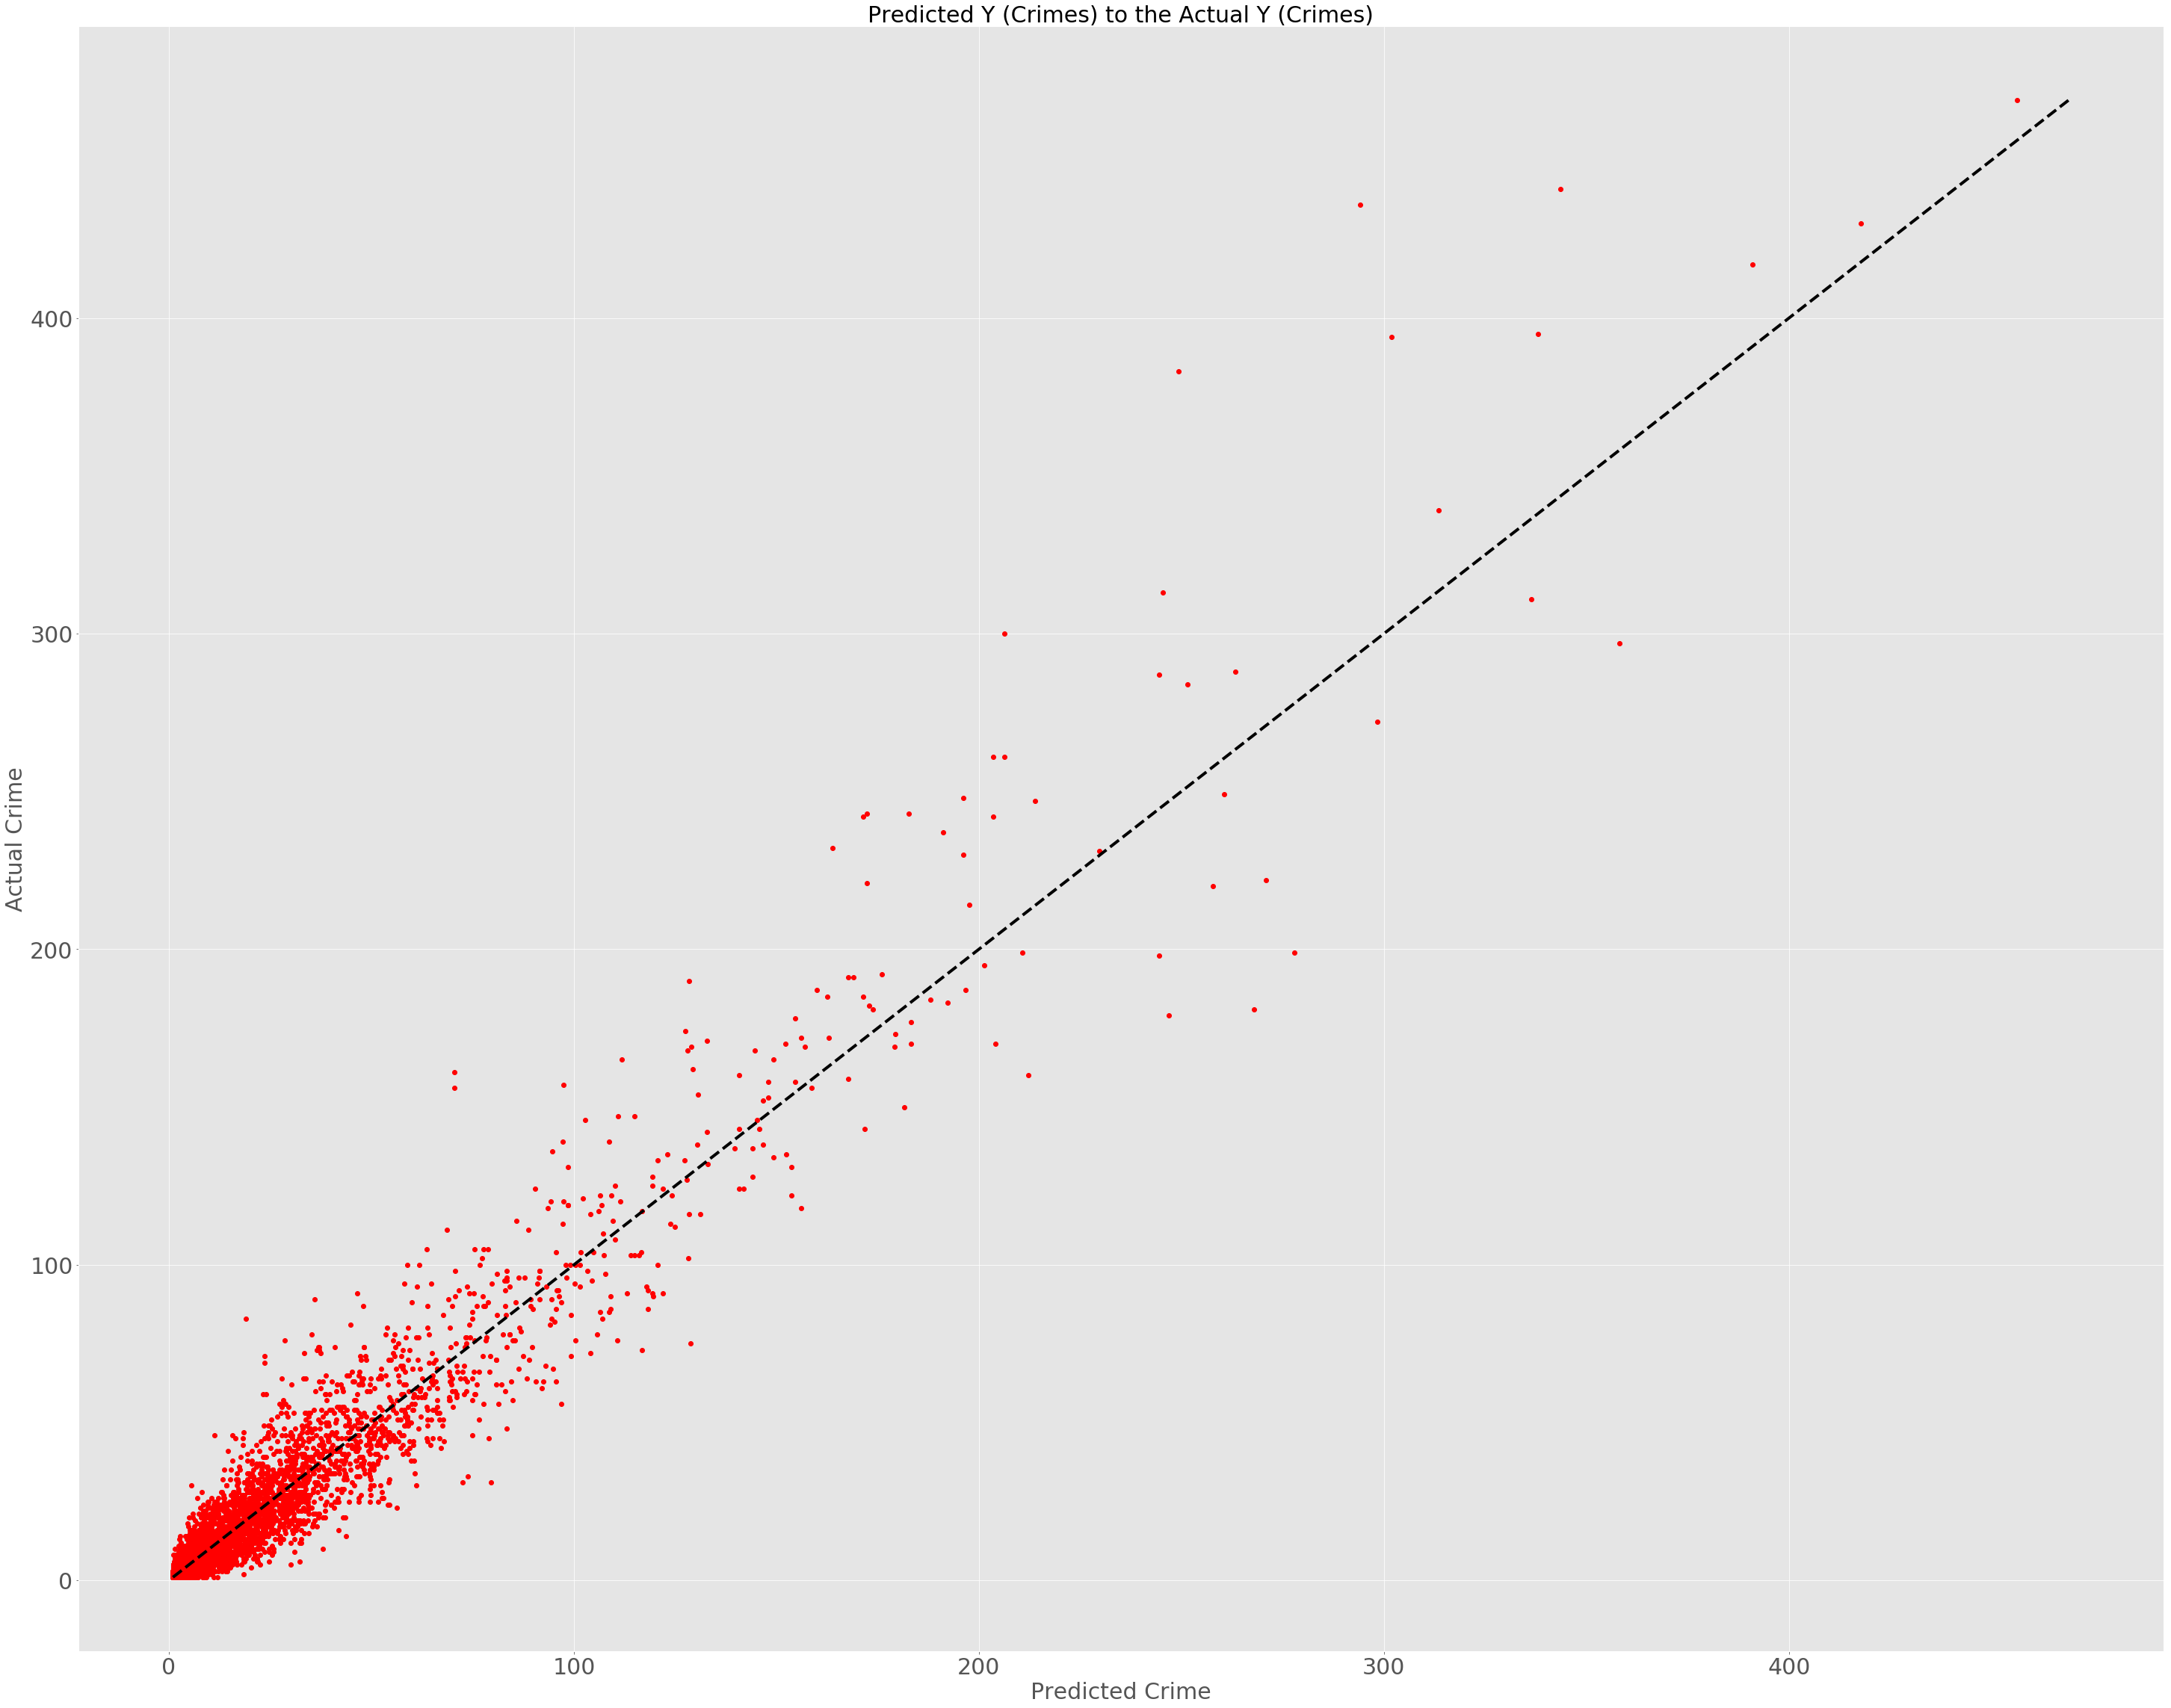

In [34]:
visualisation_prediction(y_test, y_pred)

In [35]:
y_pred_2016_rf = rf.predict(x_test_2016)

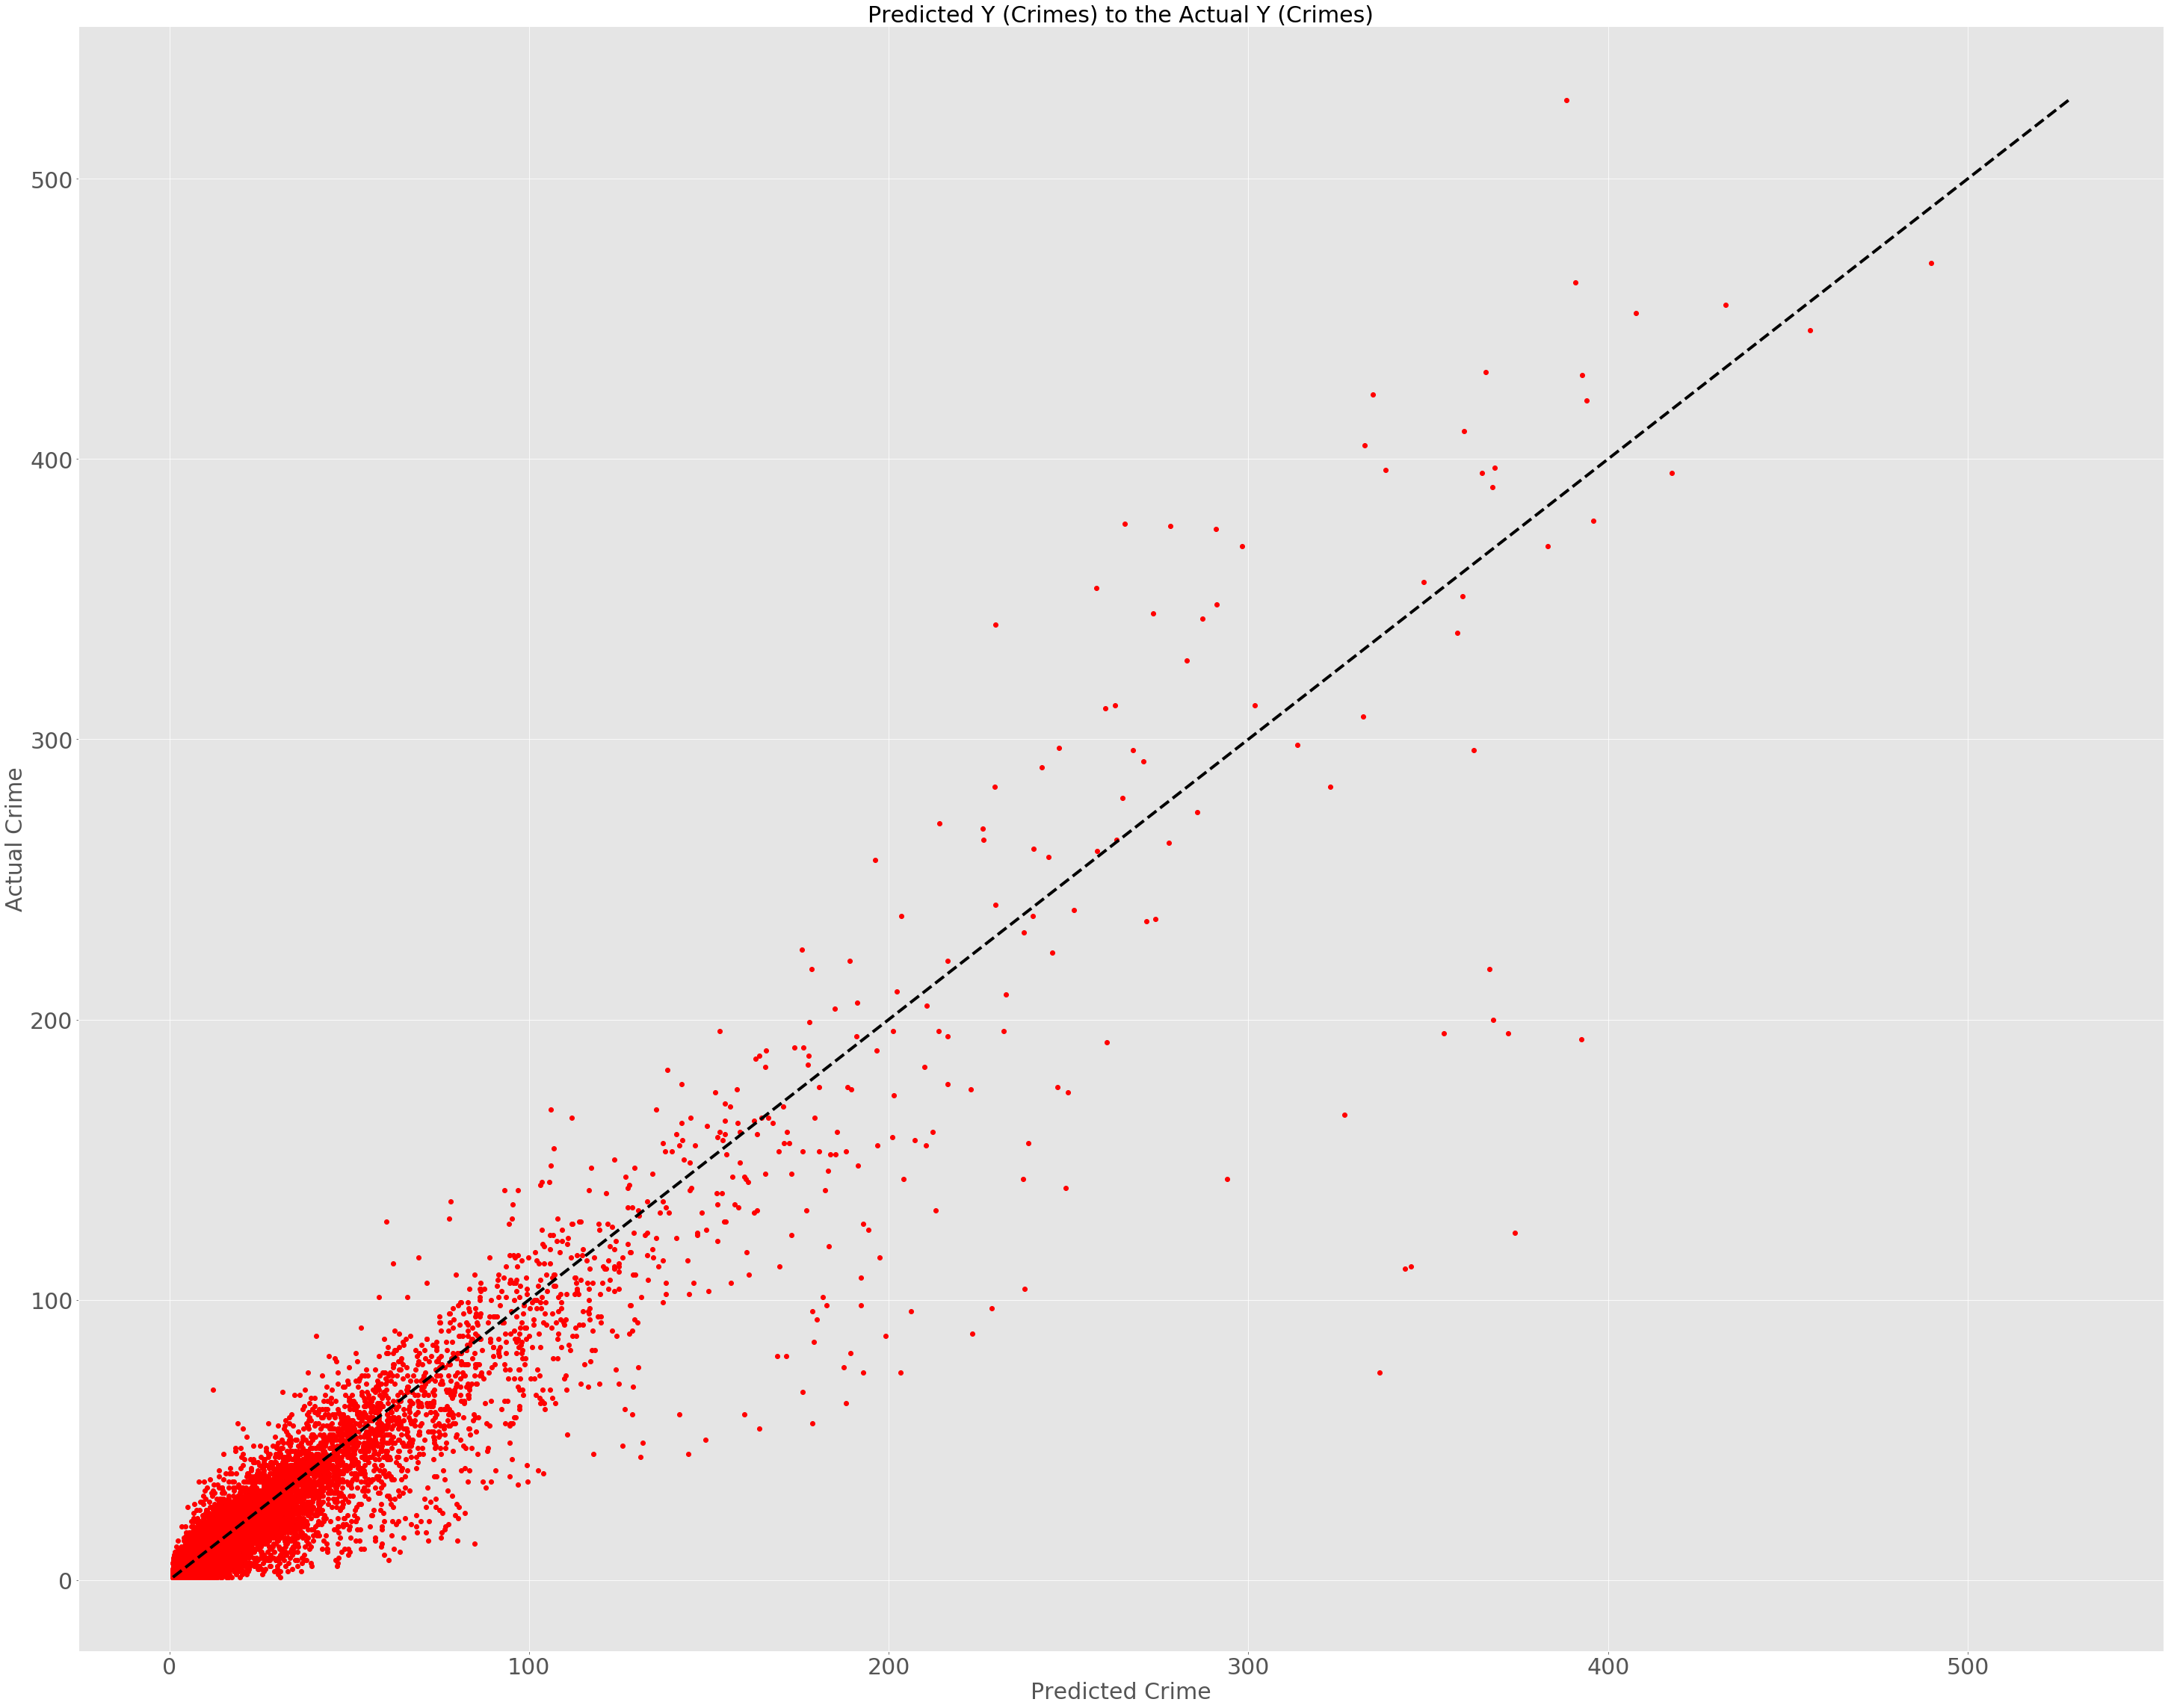

In [36]:
visualisation_prediction(y_test_2016, y_pred_2016_rf)

In [48]:
name_area = ['community_area_name_' + s for s in  config['NameArea']]
NameCrime = ['primary_type_' + s for s in config['NameCrime']]
month = ['janvier', 'fevrier','mars','avril','mai','juin','juillet', 'aout','septembre','octobre','novembre','decembre']

In [38]:
cl ={'dnn':NN_regression[0], 'rf' : rf, 'xgboost' : xgb_regression}

In [86]:
df_pred = return_crime_prediction('primary_type_ASSAULT', 'community_area_name_Austin',cl['rf'])

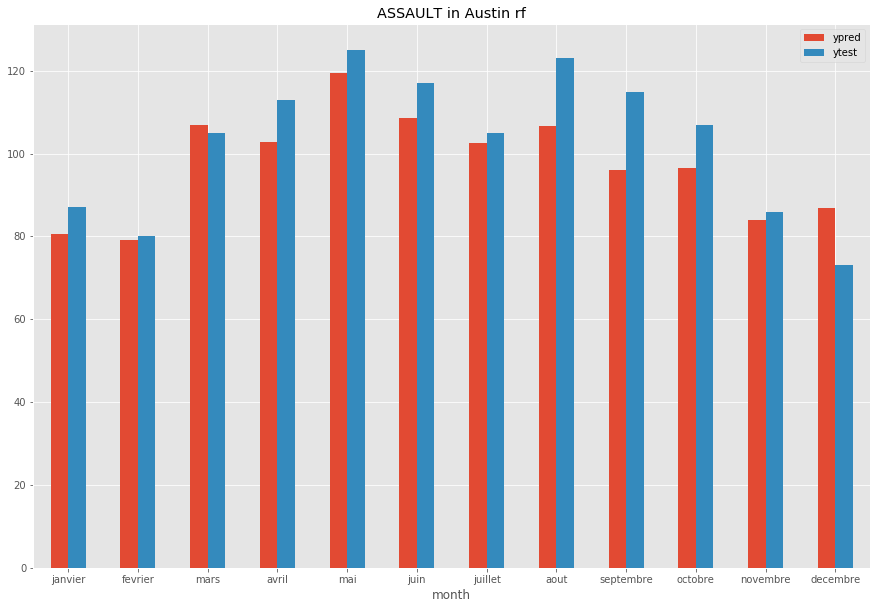

In [87]:
df_plot_prediction('primary_type_ASSAULT', 'community_area_name_Austin',\
                   return_df_concatenate(cl['rf']), cl['rf'], 'rf')

In [88]:
def MAPE(y_true, y_pred):
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [89]:
MAPE(df_pred.ytest, df_pred.ypred)

7.856771822318463